# <center> House Price Prediction
## <center> Log Transformation and Re-handling Outliers using LocalOutlierFactor

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime


import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import sklearn
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae




import warnings
warnings.filterwarnings("ignore")

In [67]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [68]:
#data=pd.read_csv("house_price_part1.csv")
#data.info()
train_data=pd.read_csv("cars_price_prediction_22_features.csv")
train_data["AgeRemodAdd"]=datetime.datetime.now().year-train_data["YearRemodAdd"]

In [69]:
train_data.drop(columns=["YearRemodAdd"],inplace=True)

In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1318 non-null   int64  
 1   OverallQual    1318 non-null   int64  
 2   GarageCars     1318 non-null   float64
 3   FullBath       1318 non-null   int64  
 4   TotRmsAbvGrd   1318 non-null   int64  
 5   SalePrice      1318 non-null   float64
 6   BsmtQual       1318 non-null   object 
 7   BsmtCond       1318 non-null   object 
 8   ExterQual      1318 non-null   object 
 9   Foundation     1318 non-null   object 
 10  GarageFinish   1318 non-null   object 
 11  HeatingQC      1318 non-null   object 
 12  KitchenQual    1318 non-null   object 
 13  BsmtFinType1   1318 non-null   object 
 14  Condition2     1318 non-null   object 
 15  HouseStyle     1318 non-null   object 
 16  Exterior1st    1318 non-null   object 
 17  Age            1318 non-null   int64  
 18  GrLivAre

In [71]:
X=train_data.drop(columns="SalePrice")
Y=train_data["SalePrice"]

In [72]:
num_df=X.select_dtypes(exclude="object")
cat_df=X.select_dtypes(include="object")
cat_df=cat_df.astype("category")
x=pd.concat([num_df,cat_df],axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     1318 non-null   int64   
 1   OverallQual    1318 non-null   int64   
 2   GarageCars     1318 non-null   float64 
 3   FullBath       1318 non-null   int64   
 4   TotRmsAbvGrd   1318 non-null   int64   
 5   Age            1318 non-null   int64   
 6   GrLivArea_m2   1318 non-null   float64 
 7   GarageArea_m2  1318 non-null   float64 
 8   TotalBsmt_m2   1318 non-null   float64 
 9   1stFlr_m2      1318 non-null   float64 
 10  AgeRemodAdd    1318 non-null   int64   
 11  BsmtQual       1318 non-null   category
 12  BsmtCond       1318 non-null   category
 13  ExterQual      1318 non-null   category
 14  Foundation     1318 non-null   category
 15  GarageFinish   1318 non-null   category
 16  HeatingQC      1318 non-null   category
 17  KitchenQual    1318 non-null   ca

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=123)
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)

(988, 22) (988,) (330, 22) (330,)


In [76]:
model_=[]
score_=[]
def predict(ml_model):
    #print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    model_.append(type(ml_model).__name__)
    score_.append(np.round(r2score,2))
    
     
    sns.distplot(y_test-predictions)      
          

Training score: 0.9783674762148753
Predictions are: [120816.64  107756.766 216089.52  190764.4    55038.1  ]


r2 score is: 0.8706432626642646
MAE:656524834.5684648
MSE:656524834.5684648
RMSE:25622.740574896838


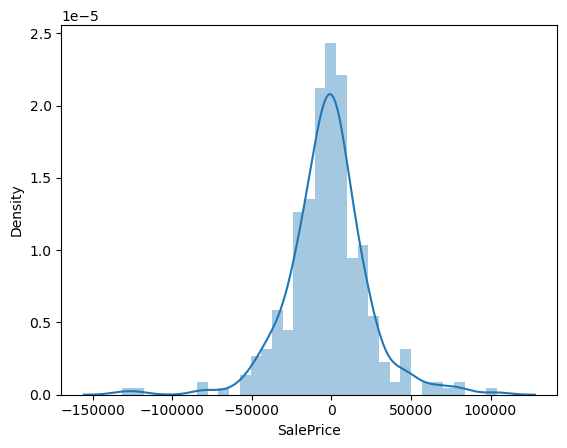

In [77]:
xgb_best_param2=XGBRegressor(
 subsample =0.731,
 enable_categorical=True,
 tree_method="hist",
 random_state=123,
 reg_lambda= 0.4631,
 reg_alpha= 0.4,
 n_estimators= 538,
 max_depth= 3,
 max_cat_to_onehot=1,
 learning_rate= 0.09,
 colsample_bytree= 0.29,
 colsample_bynode= 0.8,
 colsample_bylevel= 0.9,
 min_child_weight=0.8
)
predict(xgb_best_param2)

<Axes: xlabel='Age', ylabel='Count'>

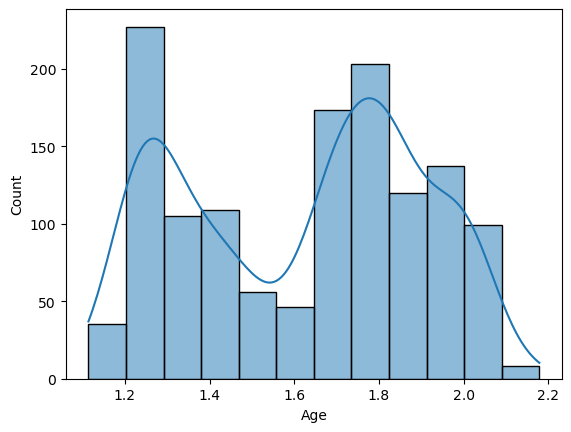

In [62]:
#sns.histplot(train_data,x="Age",kde=True)
log_age=np.log10(train_data["Age"])
log_age=log_age.to_frame()
sns.histplot(log_age,x="Age",kde=True)
